In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=(12,8)#h,w

In [8]:
df = pd.read_csv("driver-data.csv") # import data 
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [11]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [13]:
from sklearn.cluster import KMeans

Kmeans=KMeans(n_clusters=2)
Kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
df_analyze = df.drop(["id"],axis=1)

In [15]:
df_analyze.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [16]:
Kmeans.fit(df_analyze) # new data fit kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
Kmeans.cluster_centers_ # help to find the center

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [18]:
Kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
Kmeans.fit_predict(df_analyze)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [19]:
len(Kmeans.labels_)

4000

In [32]:
Kmeans.fit_predict(df_analyze) is Kmeans.labels_

True

In [20]:
type(Kmeans.labels_)

numpy.ndarray

In [21]:
unique,count=np.unique(Kmeans.labels_,return_counts=True)

In [22]:
unique,count

(array([0, 1], dtype=int32), array([3200,  800]))

In [24]:
df_analyze["cluster"]=Kmeans.labels_

In [25]:
df_analyze["cluster"] # y

0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: cluster, Length: 4000, dtype: int32

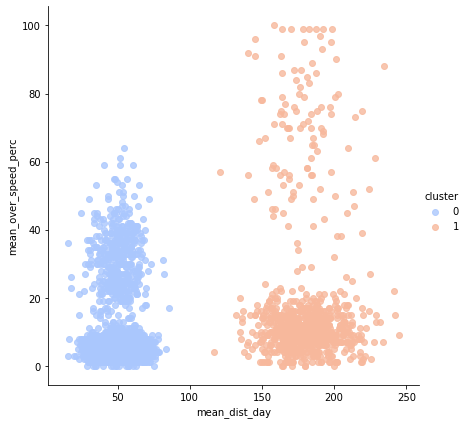

In [30]:
sns.set_style=("whitegrid")
sns.lmplot('mean_dist_day','mean_over_speed_perc',
          data=df_analyze,hue='cluster',palette="coolwarm",
          size=6,aspect=1,fit_reg=False)